In [1]:
import numpy as np
import pandas as pd
from scipy.stats import erlang, expon
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [31]:
mean_los = 12
rv_expon = expon(scale=mean_los)
rv_erlang2 = erlang(2, scale=mean_los / 2)
rv_erlang8 = erlang(8, scale=mean_los / 8)

In [32]:
print(rv_expon.mean())
print(rv_erlang2.mean())
print(rv_erlang8.mean())

12.0
12.0
12.0


In [33]:
print(rv_expon.var() / rv_expon.mean() ** 2)
print(rv_erlang2.var() / rv_erlang2.mean() ** 2)
print(rv_erlang8.var() / rv_erlang8.mean() ** 2)

1.0
0.5
0.125


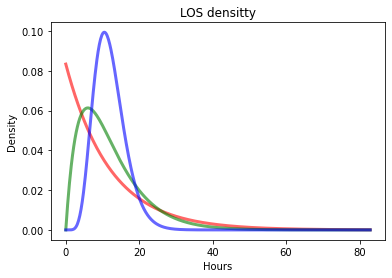

In [34]:
plt.title("LOS densitty")
plt.xlabel("Hours")
plt.ylabel("Density")

x_expon = np.linspace(rv_expon.ppf(0.0001),
                rv_expon.ppf(0.999), 500)

plt.plot(x_expon, rv_expon.pdf(x_expon),
       'r-', lw=3, alpha=0.6, label='Expon pdf');

plt.plot(x_expon, rv_erlang2.pdf(x_expon),
       'g-', lw=3, alpha=0.6, label='Erlang2 pdf');

plt.plot(x_expon, rv_erlang8.pdf(x_expon),
       'b-', lw=3, alpha=0.6, label='Erlang8 pdf');

In [3]:
np.random.exponential(1.0)

1.9822104790516948

In [11]:
import networkx as nx

In [12]:
G = nx.DiGraph()
G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(2, 4)
G.add_edge(4, 5)

In [13]:
[n for n in G.nodes]

[0, 1, 2, 4, 5]

In [14]:
G.nodes[0]['id'] = 0
G.nodes[1]['id'] = 1
G.nodes[2]['id'] = 2
G.nodes[4]['id'] = 4
G.nodes[5]['id'] = 5

In [15]:
G.pred[4]

AtlasView({2: {}})

In [16]:
G.nodes[4]

{'id': 4}

In [17]:
[n for n in G.neighbors(0)]

[1]

In [27]:
G.adj[0]

TypeError: 'AdjacencyView' object is not callable

In [31]:
print(G.nodes(data = True)[4])

{'id': 4}


In [35]:
[G.nodes(data = 'id')[n] for n in G.successors(2)]

[4]

In [36]:
[G.nodes(data = 'id')[n] for n in G.successors(2)][0]

4

In [4]:
import yaml

In [33]:
with open('test_config.yaml', 'rt') as yamlfile:
    inputs = yaml.safe_load(yamlfile)
    
inputs.keys()

dict_keys(['paths', 'global_vars', 'random_number_streams', 'locations', 'routes'])

In [34]:
inputs['routes']

{0: {'id': 0,
  'edges': [{'id': 0, 'from': 0, 'to': 1},
   {'id': 1, 'from': 1, 'to': 2},
   {'id': 2, 'from': 2, 'to': 4},
   {'id': 3, 'from': 4, 'to': 5}]},
 1: {'id': 1,
  'edges': [{'id': 0, 'from': 0, 'to': 1},
   {'id': 1, 'from': 1, 'to': 2},
   {'id': 2, 'from': 2, 'to': 3},
   {'id': 3, 'from': 3, 'to': 4},
   {'id': 4, 'from': 4, 'to': 5}]}}

In [36]:
for route_num, route in inputs['routes'].items():
    for edge in route['edges']:
        print(route['id'], edge)

0 {'id': 0, 'from': 0, 'to': 1}
0 {'id': 1, 'from': 1, 'to': 2}
0 {'id': 2, 'from': 2, 'to': 4}
0 {'id': 3, 'from': 4, 'to': 5}
1 {'id': 0, 'from': 0, 'to': 1}
1 {'id': 1, 'from': 1, 'to': 2}
1 {'id': 2, 'from': 2, 'to': 3}
1 {'id': 3, 'from': 3, 'to': 4}
1 {'id': 4, 'from': 4, 'to': 5}


In [29]:
inputs['locations']

{1: {'name': 'OBS', 'capacity': 10},
 2: {'name': 'LDR', 'capacity': 10},
 3: {'name': 'CSECT', 'capacity': 10},
 4: {'name': 'PP', 'capacity': 30}}

In [32]:
inputs['locations'].keys()

dict_keys([1, 2, 3, 4])

In [31]:
inputs['locations'][1]

{'name': 'OBS', 'capacity': 10}

In [7]:
inputs['global_vars']

{'arrival_rate': '0.4,',
 'mean_los_obs': '3.0,',
 'num_erlang_stages_obs': '4,',
 'mean_los_ldr': '12.0,',
 'num_erlang_stages_ldr': '4,',
 'mean_los_pp_c': '72.0,',
 'mean_los_pp_noc': '48.0,',
 'num_erlang_stages_pp': '4,',
 'mean_los_csect': '1,',
 'num_erlang_stages_csect': '4,',
 'c_sect_prob': 0.0}

In [8]:
random_number_streams = {
    'arrivals': 27,
    'los': 19
}

In [10]:
print(yaml.dump(random_number_streams))

arrivals: 27
los: 19



In [19]:
nx.write_graphml(G, "test_graphml.gml")

In [20]:
nx.write_yaml(G, "test_yaml.yaml")

In [21]:
from networkx.readwrite import json_graph

In [22]:
json_graph.node_link_data(G)

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 0}, {'id': 1}, {'id': 2}, {'id': 4}, {'id': 5}],
 'links': [{'source': 0, 'target': 1},
  {'source': 1, 'target': 2},
  {'source': 2, 'target': 4},
  {'source': 4, 'target': 5}]}

In [5]:
occ_loc_scenario_23_rep_1 = pd.read_csv('./logs/unit_occ_log_scenario_23_rep_1.csv')

In [6]:
occ_loc_scenario_23_rep_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219056 entries, 0 to 219055
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   timestamp   219056 non-null  float64
 1   occ         219056 non-null  float64
 2   occ_weight  219056 non-null  float64
 3   unit        219056 non-null  object 
dtypes: float64(3), object(1)
memory usage: 6.7+ MB


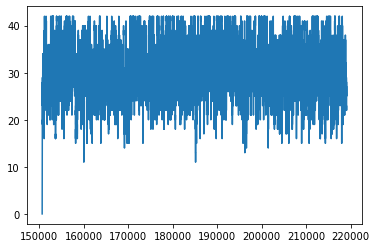

In [9]:
plt.plot(occ_loc_scenario_23_rep_1.loc[occ_loc_scenario_23_rep_1['unit'] == 'PP']['occ'])